<a href="https://colab.research.google.com/github/LeonardoSer/Univ/blob/main/NetFlow/jupyter/Survey%20Design%20Complete%20v1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Survey design problem

### Problem definition
Each customer of a set $C = \{c_1, c_2, \ldots, c_n\}$ of $n$ customers has purchased a subset of $m$  products  $P= \{p_1, p_2, \ldots, p_m\}$. 

Marketing department wants to know customers opinion and design a survey with the following requirements:

1. Each customer $i$ agreed to answer a number of questions about the purchased products in the range $[q^{\min}_i, q^{\max}_i]$ 
2. For each product $j$, the marketing department requires at least  $a^{\min}_j$ and at most $a^{\max}_j$ answers.

**Find** an assignment of questions to clients that satisfies the above requirements.


### Instance generation

The <code>random</code> package is used to generate an instance of the survey design problem.
A real instance will read data from a file.

In [ ]:
import networkx as nx
import random as rnd
import matplotlib.pyplot as plt
from IPython.display import SVG
import pygraphviz as pgv

rnd.seed (10)

n_customers = 5
n_products = 7

# Customers list
customers = ['c' + str(i + 1) for i in range(n_customers)]

#Products list
products = ['p' + str(i + 1) for i in range(n_products)]

# Random generation of purchases
# threshold = 0 implies that each customer purchased all products

threshold = 0.3
purchases={i:[j for j in products if rnd.random() > threshold] \
           for i in customers}

#
# Print the purchases of each customer
#

for i in customers:
    print (i,"purchases:",)
    for j in purchases[i]:
        print (j,)
    print()

c1 purchases:
p1
p2
p3
p5
p6
p7

c2 purchases:
p2
p3
p5
p6

c3 purchases:
p1
p2
p3
p5
p6
p7

c4 purchases:
p1
p3
p4
p5
p6

c5 purchases:
p3
p4
p5
p6
p7



### Representing purchases with a graph G
* Nodes: $C \cup P$
* Arcs: $(i,j)$ with $l_{ij}=0$ and $u_{ij} = 1$ if customer $c_i$ bought product $p_j$

In [ ]:
customers

['c1', 'c2', 'c3', 'c4', 'c5']

In [ ]:
products

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7']

In [ ]:
purchases

{'c1': ['p1', 'p2', 'p3', 'p5', 'p6', 'p7'],
 'c2': ['p2', 'p3', 'p5', 'p6'],
 'c3': ['p1', 'p2', 'p3', 'p5', 'p6', 'p7'],
 'c4': ['p1', 'p3', 'p4', 'p5', 'p6'],
 'c5': ['p3', 'p4', 'p5', 'p6', 'p7']}

In [ ]:
G = nx.DiGraph()

# Set of C nodes
G.add_nodes_from (customers)

#Set of P nodes
G.add_nodes_from (products)

#Set of purchase arcs
for i in customers:
    for j in purchases[i]:
        G.add_edge(i,j,lb=0,ub=1)


### For each customer $i$ the quantities $q^\min_i$ and $q^\max_i$ are evaluated

In this example:

* The minimum number of questions per customer is equal  to $\min\{2, \text{number of purchases} \}$
* The maximum number of questions per customer is equal to  $\min\{5, \text{number of purchases} \}$



In [ ]:
customerquestions={}

for i in customers:
    minquestion = min(2,len(purchases[i]))
    maxquestion = min (5,len(purchases[i]))
    customerquestions [i] = (minquestion,maxquestion)
 

### For each product the quantities $a_j^\min$ and $a_j^\max$ are evaluated

In this example:

* The minimum number of answers per product is equal to $\min\{3, \text{number of  sold products}\}$
* The maximum number of answers per product is equal to $\min\{5, \text{number of sold products}\}$

**Remark** The sold quantity of product $j$ is evaluated by accessing the indegree of  node $p_j$ in $G$

In [ ]:
productanswers={}

for j in products:
    minanswer = min (3, G.in_degree(j))
    maxanswer = min (5, G.in_degree(j))
    productanswers [j] = (minanswer,maxanswer)

### Extending G

The graph $G$ is extended by adding two nodes $s$ and $t$ and two sets of edges:

1. Arc $(s,c_i)$ for all customers with $l_{si}=q^\min_i$ and $u_{si}=q^\max_i$
2. Arc $(p_j,t)$ for all products with $l_{jt}=a^\min_j$ and $u_{jt}=a^\max_j$

In [ ]:
G.add_node('s')

for i in customers:
    G.add_edge('s',i,lb=customerquestions[i][0],\
               ub=customerquestions[i][1])

G.add_node('t')

for j in products:
    G.add_edge(j,'t',lb=productanswers[j][0],\
               ub=productanswers[j][1])


### Draw the graph $G$
_If you experience problem with the drawing functions remove this cell from your notebook_


In [ ]:
offset = 0.45
count = 0

lenghtcust = 135.0 * float(len(customers))
lenghtprod = 135.0 * float(len(products))
lenght = max (lenghtcust, lenghtprod)

offsetcust = lenght / len(customers)
offsetprod = lenght / len(products)

for i in customers:
    G.nodes[i]['pos'] = "%f,%f"%(200, offsetcust * count)
    count += 1

count = 0

for j in products:
    G.nodes[j]['pos'] = "%f,%f"%(500, offsetprod * count)
    count += 1
    
G.nodes['s']['pos'] = "%f,%f"%(0.0, offset * count * 300 / 2.0)
G.nodes['t']['pos'] = "%f,%f"%(700, offset * count * 300 /2.0)




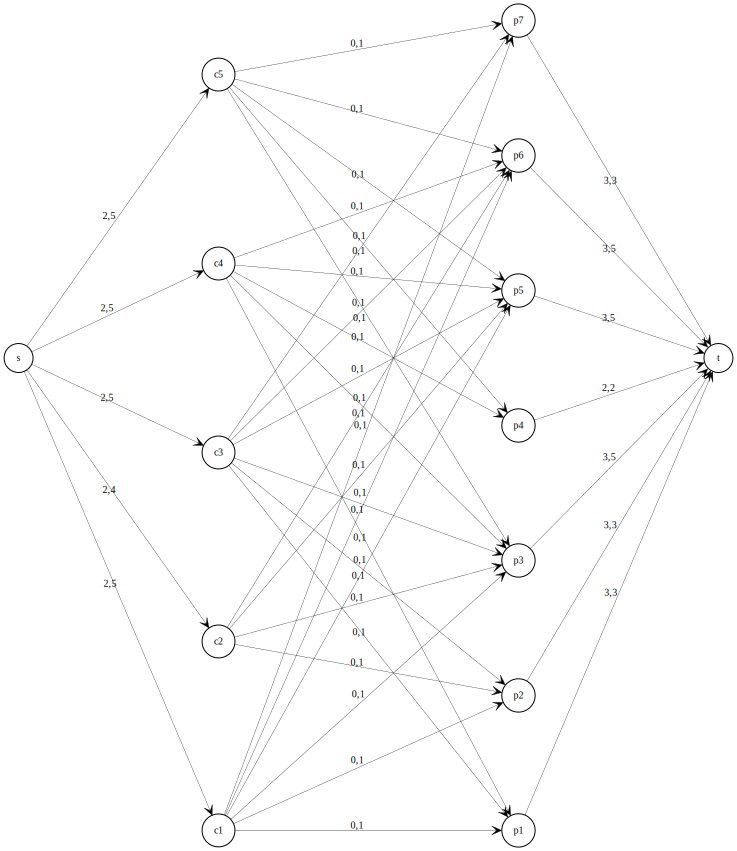

In [ ]:
for i in G.edges():
    G[i[0]][i[1]]['xlabel'] = '%d,%d'%(G[i[0]][i[1]]['lb'],G[i[0]][i[1]]['ub'])

d = nx.nx_agraph.to_agraph(G)

d.node_attr.update (fontsize='10', width=0.4, shape='circle')

d.edge_attr.update(fontsize='10', arrowhead='vee', penwidth=0.3)
#d.node_attr['shape']='circle


d.draw ('img.svg', prog='neato', args='-n2')

SVG(filename='img.svg')
#Image ('img.png')



### Finding a feasible assignment

**Step 1.** Generate a copy $H$ of the graph $G$

**Remember** The <code>copy()</code> method  makes a complete copy of the graph including all of the node or edge attributes.

In [ ]:
H = G.copy()

**Step 2.** Capacity scaling: capacity of each arc of $H$ is scaled  to $u_{ij} - l_{ij}$ 


In [ ]:
for j in H.edges():
    H[j[0]][j[1]]['capacity'] = \
    H[j[0]][j[1]]['ub'] -  H[j[0]][j[1]]['lb']

**Step 3.** Add an arc between $t$ and $s$ with infinite capacity (i.e., a capacity large enough)

**Remark** In this case you can assign to the arc $(t,s)$ a capacity equal to the sum of questions that can be asked to all customers: 

$$u_{ts} = \sum_{i \in C} q_i^{\max}$$

In [ ]:
ts_cap = 0

for i in customers:
    ts_cap += H['s'][i]['ub']

H.add_edge ('t','s',capacity=ts_cap)

**Step 4.** Two extra nodes $s_1$ and $t_1$ are added to $H$

In [ ]:
H.add_node('s1')
H.add_node('t1')

**Step 5.** For each node, the flow unbalance is evaluated

**Remark** Flow unbalance is stored in a dictionary and is evaluated on graph $G$. By constructions, the sum of flow unbalance is equal to 0

In [ ]:
unbalance = {}

for i in G.nodes():
        auxunb = 0
        for j in G.in_edges(i):
            auxunb += G[j[0]][j[1]]['lb']
        
        for j in G.out_edges(i):
            auxunb -= G[j[0]][j[1]]['lb']
        
        unbalance[i] = auxunb


**Step 6.** Two set of arcs are added to $H$:
1. Arcs $(s_1, i)$ if flow unbalance of $i>0$
2. Arcs $(i, t_1)$ if flow unbalance of $i<0$

In [ ]:
for i in unbalance:

    if unbalance[i] > 0:
        H.add_edge ('s1',i,capacity = unbalance[i])
    if unbalance[i] < 0:
        H.add_edge (i,'t1',capacity =- unbalance[i])


### Check the graph $H$
Print the outgoing edges from $s1$ and ingoing edges to $t1$ along with their capacity

In [ ]:
total_capacity = 0
for i in H.out_edges('s1'):
    print ("Capacity of arc (%s,%s):" % (i[0],i[1]), H[i[0]][i[1]]['capacity'])
    total_capacity += H[i[0]][i[1]]['capacity']

print ("Cut capacity:", total_capacity)
print ()

total_capacity = 0
for i in H.in_edges('t1'):
        print ("Capacity of arc (%s,%s):" % (i[0],i[1]), H[i[0]][i[1]]['capacity'])
        total_capacity += H[i[0]][i[1]]['capacity']

print ("Cut capacity:", total_capacity)
    



Capacity of arc (s1,c1): 2
Capacity of arc (s1,c2): 2
Capacity of arc (s1,c3): 2
Capacity of arc (s1,c4): 2
Capacity of arc (s1,c5): 2
Capacity of arc (s1,t): 20
Cut capacity: 30

Capacity of arc (p1,t1): 3
Capacity of arc (p2,t1): 3
Capacity of arc (p3,t1): 3
Capacity of arc (p4,t1): 2
Capacity of arc (p5,t1): 3
Capacity of arc (p6,t1): 3
Capacity of arc (p7,t1): 3
Capacity of arc (s,t1): 10
Cut capacity: 30


**Step 7.** Evaluate the maximum $s_1-t_1$ flow and check if a valid circulation exists


In [ ]:
value, flow = nx.maximum_flow(H,'s1','t1', 'capacity')

for i in H.out_edges('s1'):
    print ("Flow and capacity of arc (%s,%s):"\
           % (i[0],i[1]), H[i[0]][i[1]]['capacity'], flow[i[0]][i[1]])
    if H[i[0]][i[1]]['capacity'] != flow[i[0]][i[1]]:
        print ("Valid circulation not found")
        break
    


Flow and capacity of arc (s1,c1): 2 2
Flow and capacity of arc (s1,c2): 2 2
Flow and capacity of arc (s1,c3): 2 2
Flow and capacity of arc (s1,c4): 2 2
Flow and capacity of arc (s1,c5): 2 2
Flow and capacity of arc (s1,t): 20 20


**Step 8.** Print the result

**Remark** Note that the flows we print are the flows of the arcs $(c_i, p_j)$, that have $l_{ij} = 0$. Thus, rescaling is not needed

In [ ]:
for i in customers:
    print ("Customer", i, "will asked about product(s):",)
    for j in flow[i]:
        if flow[i][j] > 0:
            print (j,)
    print ()

Customer c1 will asked about product(s):
p1
p2
p3
p6
p7

Customer c2 will asked about product(s):
p2
p3
p5
p6

Customer c3 will asked about product(s):
p1
p2
p3
p5
p7

Customer c4 will asked about product(s):
p1
p4
p5
p6

Customer c5 will asked about product(s):
p4
p7



In [ ]:
for i in customers:
    for j in products:
        if G.has_edge(i,j):
            if flow[i][j] > 0:
                G[i][j]['color'] = 'blue'
                G[i][j]['penwidth'] = '2.0'
            else:
                G[i][j]['penwidth'] = '0.5'

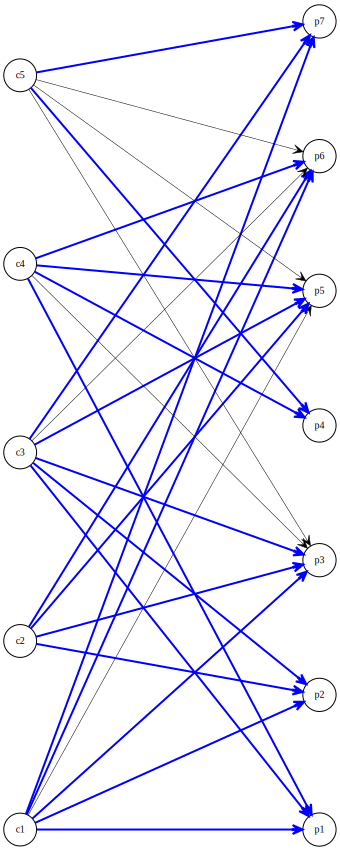

In [ ]:
for i in G.edges():
    G[i[0]][i[1]]['xlabel'] = ''

d = nx.nx_agraph.to_agraph(G)
d.remove_node ('s')
d.remove_node('t')
d.node_attr.update (fontsize='10', width=0.4, shape='circle')
d.edge_attr.update(fontsize='10', arrowhead='vee')
d.draw ('img.svg', prog='neato', args='-n2')

SVG(filename='img.svg')